In [1]:
import pandas as pd
import numpy as np
import pickle

In [2]:
anime_df = pd.read_csv('anime.csv', usecols=['anime_id', 'name'], dtype = {'anime_id': 'int32', 'name': 'str'})
rating_df = pd.read_csv('rating.csv', usecols=['user_id', 'anime_id', 'rating'], dtype = {'user_id': 'int32', 'anime_id': 'int32', 'rating': 'int32'})

In [3]:
anime_df.head(10)

,anime_id,name
0,32281,Kimi no Na wa.
1,5114,Fullmetal Alchemist: Brotherhood
2,28977,Gintama°
3,9253,Steins;Gate
4,9969,Gintama&#039;
5,32935,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...
6,11061,Hunter x Hunter (2011)
7,820,Ginga Eiyuu Densetsu
8,15335,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...
9,15417,Gintama&#039;: Enchousen


In [4]:
rating_df.head(10)

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1
5,1,355,-1
6,1,356,-1
7,1,442,-1
8,1,487,-1
9,1,846,-1


In [5]:
# join tables through anime_id
df = pd.merge(rating_df, anime_df, on='anime_id')
df.head()

,user_id,anime_id,rating,name
0,1,20,-1,Naruto
1,3,20,8,Naruto
2,5,20,6,Naruto
3,6,20,-1,Naruto
4,10,20,-1,Naruto


In [6]:
df.dtypes

user_id      int32
anime_id     int32
rating       int32
name        object
dtype: object

In [7]:
# visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

In [8]:
df.groupby('name')['rating'].count().sort_values(ascending = False).head()

name
Death Note                         39340
Sword Art Online                   30583
Shingeki no Kyojin                 29584
Code Geass: Hangyaku no Lelouch    27718
Elfen Lied                         27506
Name: rating, dtype: int64

In [9]:
# create ratings table with avg rating column
ratings = pd.DataFrame(df.loc[df['rating'] > 0].groupby('name')['rating'].mean())
ratings.head()

,rating
name,
&quot;0&quot;,4.764706
"&quot;Aesop&quot; no Ohanashi yori: Ushi to Kaeru, Yokubatta Inu",1.000000
&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,7.343307
&quot;Bungaku Shoujo&quot; Memoire,7.744713
&quot;Bungaku Shoujo&quot; Movie,7.840154


In [10]:
ratings['num_ratings'] = pd.DataFrame(df.groupby('name')['rating'].count())
ratings.head()

,rating,num_ratings
name,,
&quot;0&quot;,4.764706,26
"&quot;Aesop&quot; no Ohanashi yori: Ushi to Kaeru, Yokubatta Inu",1.000000,2
&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,7.343307,782
&quot;Bungaku Shoujo&quot; Memoire,7.744713,809
&quot;Bungaku Shoujo&quot; Movie,7.840154,1535


<AxesSubplot:>

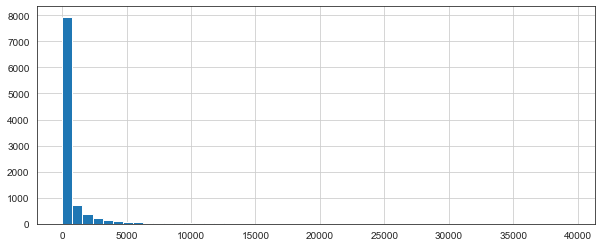

In [11]:
plt.figure(figsize=(10,4))
ratings['num_ratings'].hist(bins = 50)

<AxesSubplot:>

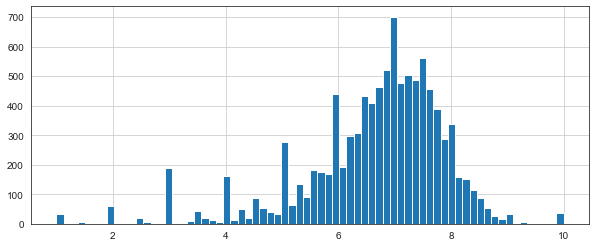

In [12]:
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=70)

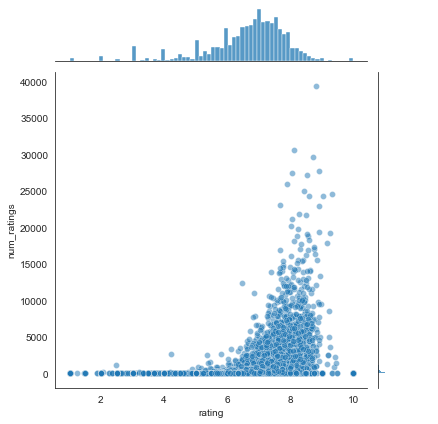

In [13]:
sns.jointplot(x = 'rating', y = 'num_ratings', data = ratings, alpha = 0.5)

In [14]:
df.head(10)

,user_id,anime_id,rating,name
0,1,20,-1,Naruto
1,3,20,8,Naruto
2,5,20,6,Naruto
3,6,20,-1,Naruto
4,10,20,-1,Naruto
5,21,20,8,Naruto
6,28,20,9,Naruto
7,34,20,9,Naruto
8,38,20,6,Naruto
9,39,20,10,Naruto


In [15]:
# create matrix representing each user's rating of every anime (nan if not rated)
print('remaking animemat')
animemat = df.pivot_table(index = 'user_id', columns = 'name', values = 'rating')
animemat.head()

remaking animemat


name,&quot;0&quot;,"&quot;Aesop&quot; no Ohanashi yori: Ushi to Kaeru, Yokubatta Inu",&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,&quot;Bungaku Shoujo&quot; Memoire,&quot;Bungaku Shoujo&quot; Movie,&quot;Eiji&quot;,.hack//G.U. Returner,.hack//G.U. Trilogy,.hack//G.U. Trilogy: Parody Mode,.hack//Gift,...,makemagic,"on-chan, Yume Power Daibouken!",s.CRY.ed,vivi,xxxHOLiC,xxxHOLiC Kei,xxxHOLiC Movie: Manatsu no Yoru no Yume,xxxHOLiC Rou,xxxHOLiC Shunmuki,◯
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN


In [16]:
ratings.sort_values('num_ratings', ascending = False).head(10)

,rating,num_ratings
name,,
Death Note,8.834629,39340
Sword Art Online,8.140213,30583
Shingeki no Kyojin,8.725741,29584
Code Geass: Hangyaku no Lelouch,8.927796,27718
Elfen Lied,8.064434,27506
Angel Beats!,8.549714,27183
Naruto,7.893888,25925
Fullmetal Alchemist,8.453356,25032
Fullmetal Alchemist: Brotherhood,9.322741,24574


In [17]:
ratings.head()

,rating,num_ratings
name,,
&quot;0&quot;,4.764706,26
"&quot;Aesop&quot; no Ohanashi yori: Ushi to Kaeru, Yokubatta Inu",1.000000,2
&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,7.343307,782
&quot;Bungaku Shoujo&quot; Memoire,7.744713,809
&quot;Bungaku Shoujo&quot; Movie,7.840154,1535


In [18]:
filename = 'get_recs.pkl'
pickle.dump(animemat, open(filename, 'wb'))

In [19]:
ratings_file = 'ratings_model.pkl'
pickle.dump(ratings, open(ratings_file, 'wb'))